In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
folder = "frequency"

In [4]:
parameters = {"start": 0.5, "end": 2.5}

In [5]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-29-17-34-15_p1-diff.hdf5")
e.add_experiment(name="p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-29-17-34-15_p1_p2-diff.hdf5")


   

In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-29-17-34-15_p1-diff.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-29-17-34-15_p1_p2-diff.hdf5


In [7]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 7.72 s, sys: 641 ms, total: 8.36 s
Wall time: 1min 22s


In [8]:
colors = {"p1": "black",
         "p1_p2": "green" }
bins=10

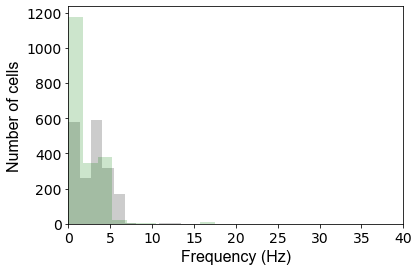

In [9]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

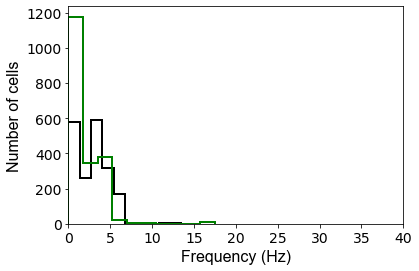

In [10]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,40)},
                         folder=folder, save=True)

In [11]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [0,60]})

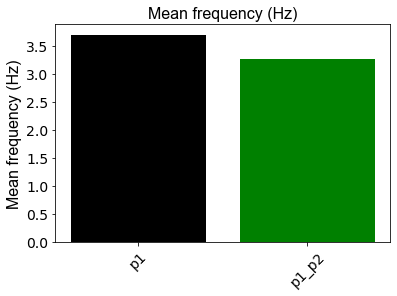

In [12]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [13]:
parameters = dict(pairs=list())
parameters["pairs"].append([f"p1", f"p1_p2", f"diff_p1_p2"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [14]:
colors = {"diff_p1_p2": "black"}

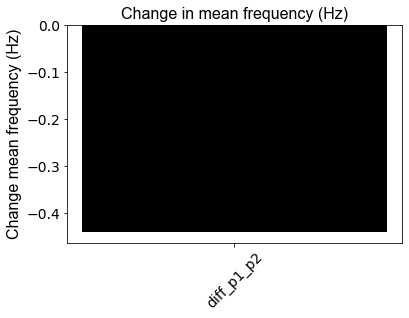

In [15]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["diff_p1_p2"], save=True)

In [16]:
parameters = {"start": 0.5, "end": 2.5}

In [17]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 9.71 s, sys: 1.05 s, total: 10.8 s
Wall time: 1min 36s


In [34]:
colors = {"p1": "black",
         "p1_p2": "green" }
bins=10

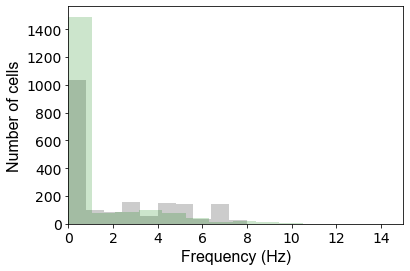

In [35]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,15)},
                         folder=folder, save=True)

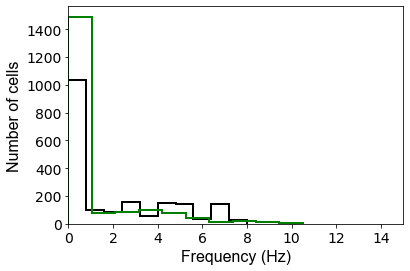

In [36]:
fig_name = f"{neuron_type}_above_0Hz"
plot_histogram_frequency_step(frequency_dict=frequency_analysis_dict, experiment_names=e,
                         fig_name=fig_name, 
                         colors=colors,bins=bins,
                         parameters={plt.xlim: (0,15)},
                         folder=folder, save=True)

In [58]:
mean_frequency_dict = mean_frequency(dictionary=frequency_analysis_dict, parameters={"interval": [0,8]})

In [59]:
colors = {"p1": "black",
         "p1_p2": "green" }
bins=10

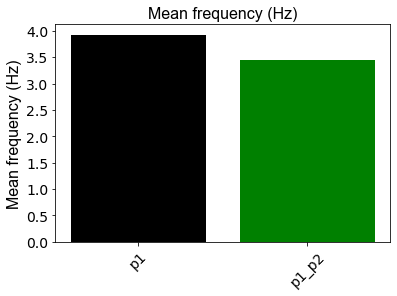

In [60]:
plot_mean_frequency(mean_frequency_dict = mean_frequency_dict, folder=folder,colors=colors, experiment_names=e)

In [61]:
parameters = dict(pairs=list())
parameters["pairs"].append([f"p1", f"p1_p2", f"diff_p1_p2"])
change = change_mean_frequency(dictionary=mean_frequency_dict, parameters=parameters)

In [62]:
colors = {"diff_p1_p2": "black"}

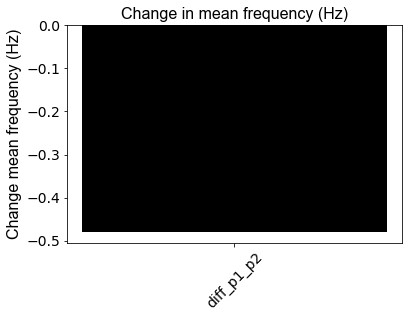

In [63]:
plot_change_mean_frequency(change_mean_frequency_dict = change, folder=folder,colors=colors, experiment_names=["diff_p1_p2"], save=True)